**PRAKHAR BHARDWAJ**


**24-787 ASSIGNMENT 2 **


ANDREW ID - prakharb

Question 4

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
np.random.seed(1)

In [22]:
cls0 = pd.read_csv('class0-input.csv')
cls1 = pd.read_csv('class1-input.csv')
X = cls0.append(cls1, ignore_index=True)
Y = pd.read_csv('labels.csv')
print(X)
print(Y)

            x1        x2
0    -0.201517 -0.683358
1     0.374519 -0.828082
2    -0.161895 -1.247107
3     0.037711 -0.047303
4    -0.260479  1.770204
...        ...       ...
9995 -1.285488  2.922818
9996  1.440506  4.047713
9997  2.325596  4.181329
9998  0.247073  4.229404
9999  1.719022  4.825350

[10000 rows x 2 columns]
      label
0         0
1         0
2         0
3         0
4         0
...     ...
9995      1
9996      1
9997      1
9998      1
9999      1

[10000 rows x 1 columns]


In [23]:
print(X.shape) 
print(Y.shape) 

(10000, 2)
(10000, 1)


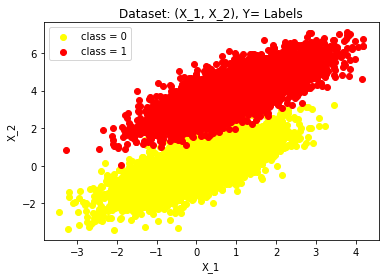

In [24]:
cls0 = pd.read_csv('class0-input.csv')
cls1 = pd.read_csv('class1-input.csv')
x = pd.concat([cls0, cls1])
#print(x)
x = np.asarray(x)
y = pd.read_csv('labels.csv')
plt.figure(figsize = (6,4))
plt.scatter(x[:5000, 0], x[:5000, 1], color='yellow', label='class = 0')
plt.scatter(x[5000:10000, 0], x[5000:10000, 1], color='red', label='class = 1')
plt.title("Dataset: (X_1, X_2), Y= Labels")
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.legend()
dataset = pd.concat([X, Y], axis=1)
plt.show()

In [25]:
# Sigmoid function
def sigmoid(x1, x2, W01, W02, b):
    return 1/(1+np.exp(-(np.dot(x1, W01) + np.dot(x2, W02) + b)))

In [45]:
# Gradients is Returned
def calculate_gradients(X_train, y_train, y_pred):
    gradient_W01 = np.dot((y_pred-y_train).T, np.array(X_train["x1"]))/(np.array(X_train["x1"])).shape[0]
    gradient_W02 = np.dot((y_pred-y_train).T, np.array(X_train["x2"]))/(np.array(X_train["x2"])).shape[0]
    gradient_b = np.sum(y_pred-y_train)
    return gradient_W01, gradient_W02, gradient_b

In [46]:
# Updated weights (W01 and W02) and bias(b) are calculated and returned  
def update_weights(W01, W02, b, gradient_W01, gradient_W02, gradient_b, lr):
    W01 -= lr * gradient_W01
    W02 -= lr * gradient_W02
    b -= lr * gradient_b
    return W01, W02, b

In [47]:
# Main function
def main(X_train, Y_train, W01, W02, b, lr, num_steps):
  for i in range(num_steps):
    Y_pred = predict(X_train, W01, W02, b)
    gradient_W01, gradient_W02, gradient_b = calculate_gradients(X_train, Y_train, Y_pred)
    W01, W02, b = update_weights(W01, W02, b, gradient_W01, gradient_W02, gradient_b, lr)
  return W01, W02, b

In [48]:
# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
def predict(X_train, W01, W02, b):
  return sigmoid((X_train['x1']), (X_train['x2']), W01, W02, b)

In [49]:
# Use the final weights to perform prediction using predict funtion
# Convert the predictions to '0' or '1'
# Calculate the accuracy using predictions and labels

shuffle_df = dataset.sample(frac=1)
train_size = int(1.0 * len(dataset))
X_train = shuffle_df[:train_size]
Y_train = X_train["label"]
X_train.drop("label", axis=1, inplace=True)
np.random.seed(seed = 2001)
W01, W02, b = main(X_train, np.array(Y_train), np.random.randint(0,9), np.random.randint(0,9), np.random.randint(0,9), 0.00005, 5000)
y_prediction_test = predict(X_train, W01, W02, b)
print(y_prediction_test)

[1.01683844e-01 9.99997615e-01 4.79397980e-01 ... 2.40452013e-05
 3.79377173e-06 9.99961734e-01]


In [50]:
Y_pred = []
for i in range(len(y_prediction_test)):
  if(y_prediction_test[i]>0.5): Y_pred.append(1)
  else: Y_pred.append(0)
print("Test accuracy: {} %".format((1-np.mean(np.abs(Y_pred - np.array(Y_train))))*100))

Test accuracy: 97.74000000000001 %


Text(0, 0.5, 'X2')

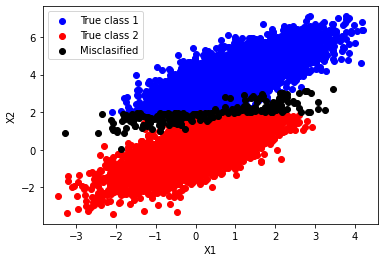

In [51]:
# Use different colors for class 0, class 1 and misclassified datapoints
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
cl3x=np.zeros(0)
cl3y=np.zeros(0)
cl1x=np.zeros(0)
cl1y=np.zeros(0)
cl2x=np.zeros(0)
cl2y=np.zeros(0)
x = np.asarray(X_train)
Y_train = np.asarray(Y_train)
for i in range(len(Y_train)):
    d = Y_train[i]
    c = Y_pred[i]
    if c!=d:
        cl3x=np.append(cl3x, x[i][0])
        cl3y=np.append(cl3y, x[i][1])
    elif d==1 and c==1:
        cl1x=np.append(cl1x, x[i][0])
        cl1y=np.append(cl1y, x[i][1])
    elif d==0 and c==0:
        cl2x=np.append(cl2x, x[i][0])
        cl2y=np.append(cl2y, x[i][1])
plt.scatter(cl1x,cl1y,color='blue', label='True class 1')
plt.scatter(cl2x,cl2y,color='red', label='True class 2')
plt.scatter(cl3x,cl3y, color='black', label='Misclasified')
plt.legend()
import matplotlib as mp1
mp1.pyplot.xlabel("X1")
mp1.pyplot.ylabel("X2")

In [52]:
# import sklearn and necessary libraries
# Print the accuracy obtained by sklearn and your model
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train.values.ravel())
print("SK learn accuracy percentage: ")
print(100*clf.score(x_train, y_train))

SK learn accuracy percentage: 
99.4875


The accuracy of our model is 97.74% while the accuracy of the sklearn model is 99.4875% 